<a href="https://colab.research.google.com/github/Megi-analitika/datascientist.github.io/blob/main/%F0%9F%8F%A1_%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%BF%D0%BE_%D0%BD%D0%B5%D0%B4%D0%B2%D0%B8%D0%B6%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D0%B8_%D0%9A%D0%B0%D0%BB%D0%B8%D1%84%D0%BE%D1%80%D0%BD%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# 🔹 1. Загрузка данных

In [2]:
# Загрузка
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

# Описание данных
print(fetch_california_housing().DESCR)
df.head()


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# 🔹 2. Проверка пропусков

In [3]:
df.isnull().sum()


,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


# 🔹 3. Базовая модель (все признаки без изменений)

In [4]:
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

y_pred_train = model_1.predict(X_train)
y_pred_test = model_1.predict(X_test)

rmse_train_1 = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test_1 = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train_1 = r2_score(y_train, y_pred_train)
r2_test_1 = r2_score(y_test, y_pred_test)

print("Модель 1 (все признаки):")
print(f"RMSE train: {rmse_train_1:.4f}, test: {rmse_test_1:.4f}")
print(f"R2 train: {r2_train_1:.4f}, test: {r2_test_1:.4f}")


Модель 1 (все признаки):
RMSE train: 0.7197, test: 0.7456
R2 train: 0.6126, test: 0.5758


# 🔹 4. Распределение целевой переменной

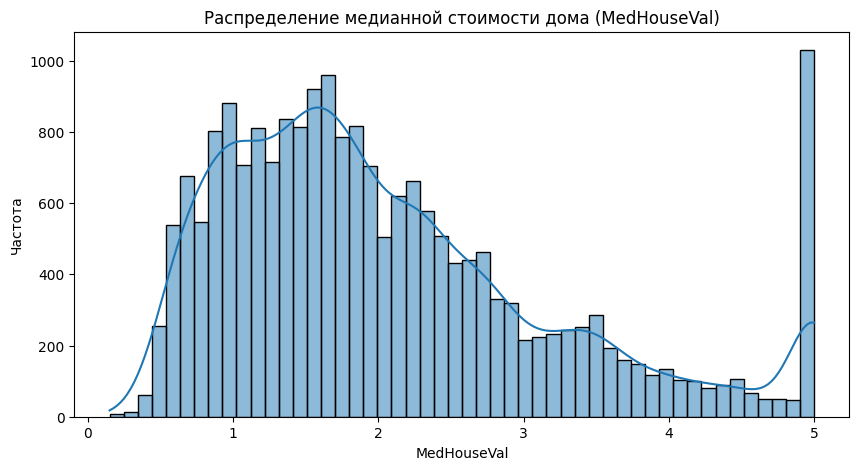

In [5]:
plt.figure(figsize=(10, 5))
sns.histplot(df['MedHouseVal'], kde=True, bins=50)
plt.title('Распределение медианной стоимости дома (MedHouseVal)')
plt.xlabel('MedHouseVal')
plt.ylabel('Частота')
plt.show()


# 🔹 5. Корреляционная матрица

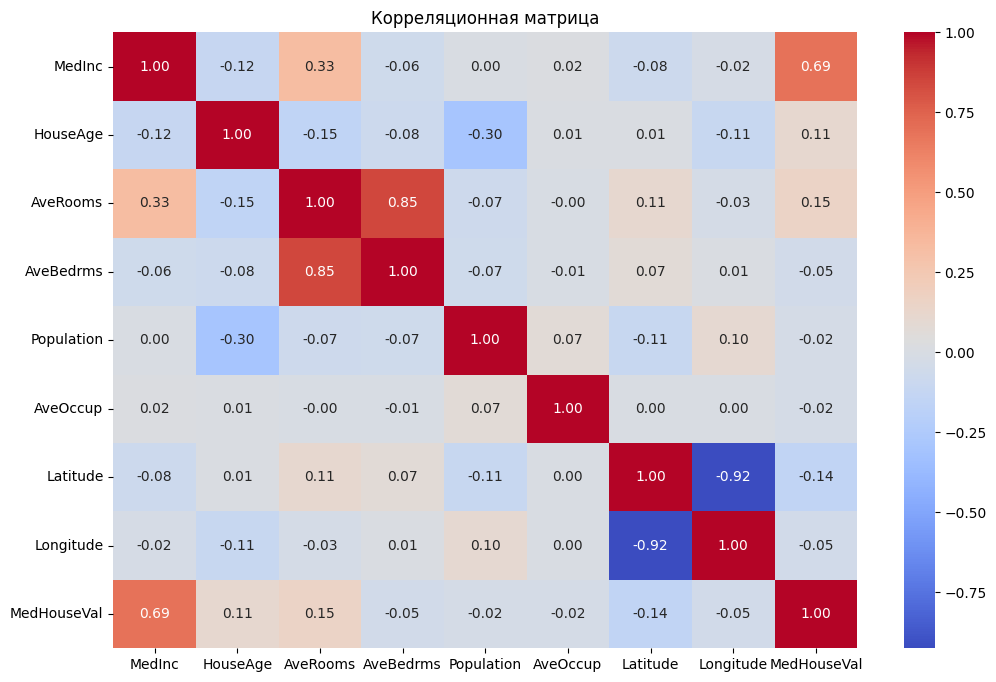

In [6]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()


# 🔹 6. Модель после отбора признаков по корреляции

In [7]:
df_corr = df.drop(columns=['Latitude', 'Longitude', 'AveOccup'])
X = df_corr.drop("MedHouseVal", axis=1)
y = df_corr["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_2 = LinearRegression()
model_2.fit(X_train, y_train)

y_pred_train = model_2.predict(X_train)
y_pred_test = model_2.predict(X_test)

rmse_train_2 = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test_2 = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train_2 = r2_score(y_train, y_pred_train)
r2_test_2 = r2_score(y_test, y_pred_test)

print("Модель 2 (признаки по корреляции):")
print(f"RMSE train: {rmse_train_2:.4f}, test: {rmse_test_2:.4f}")
print(f"R2 train: {r2_train_2:.4f}, test: {r2_test_2:.4f}")


Модель 2 (признаки по корреляции):
RMSE train: 0.7809, test: 0.8021
R2 train: 0.5438, test: 0.5090


# 🔹 7. Удаление выбросов

In [8]:
# Удалим выбросы по MedHouseVal > 4.5
df_no_outliers = df_corr[df_corr['MedHouseVal'] < 4.5]

X = df_no_outliers.drop("MedHouseVal", axis=1)
y = df_no_outliers["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_3 = LinearRegression()
model_3.fit(X_train, y_train)

y_pred_train = model_3.predict(X_train)
y_pred_test = model_3.predict(X_test)

rmse_train_3 = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test_3 = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train_3 = r2_score(y_train, y_pred_train)
r2_test_3 = r2_score(y_test, y_pred_test)

print("Модель 3 (без выбросов):")
print(f"RMSE train: {rmse_train_3:.4f}, test: {rmse_test_3:.4f}")
print(f"R2 train: {r2_train_3:.4f}, test: {r2_test_3:.4f}")


Модель 3 (без выбросов):
RMSE train: 0.6516, test: 0.6511
R2 train: 0.4870, test: 0.5106


# 🔹 8. Математическое преобразование признаков

In [9]:
df_transformed = df_no_outliers.copy()
df_transformed['AveRooms_log'] = np.log1p(df_transformed['AveRooms'])
df_transformed['HouseAge_sqrt'] = np.sqrt(df_transformed['HouseAge'])

X = df_transformed[['AveRooms_log', 'HouseAge_sqrt', 'AveBedrms', 'Population', 'MedInc']]
y = df_transformed["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_4 = LinearRegression()
model_4.fit(X_train, y_train)

y_pred_train = model_4.predict(X_train)
y_pred_test = model_4.predict(X_test)

rmse_train_4 = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test_4 = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train_4 = r2_score(y_train, y_pred_train)
r2_test_4 = r2_score(y_test, y_pred_test)

print("Модель 4 (с преобразованными признаками):")
print(f"RMSE train: {rmse_train_4:.4f}, test: {rmse_test_4:.4f}")
print(f"R2 train: {r2_train_4:.4f}, test: {r2_test_4:.4f}")


Модель 4 (с преобразованными признаками):
RMSE train: 0.6512, test: 0.6530
R2 train: 0.4877, test: 0.5078


# 🔹 9. Финальная таблица


In [10]:
result_df = pd.DataFrame({
    "Модель": ["Базовая", "Корреляция", "Без выбросов", "С преобразованиями"],
    "RMSE (test)": [rmse_test_1, rmse_test_2, rmse_test_3, rmse_test_4],
    "R2 (test)": [r2_test_1, r2_test_2, r2_test_3, r2_test_4],
    "Описание": [
        "Все признаки",
        "Удалены слабокоррелирующие",
        "Удалены слабокоррелирующие и выбросы",
        "Удалены признаки и выбросы + преобразования"
    ]
})

result_df


,Модель,RMSE (test),R2 (test),Описание
0,Базовая,0.745581,0.575788,Все признаки
1,Корреляция,0.802133,0.508995,Удалены слабокоррелирующие
2,Без выбросов,0.651128,0.510613,Удалены слабокоррелирующие и выбросы
3,С преобразованиями,0.652977,0.507830,Удалены признаки и выбросы + преобразования


# 🔹 10. Вывод



- Преобразования: удаление признаков по корреляции, удаление выбросов, логарифм/корень над признаками.
- Модель с лог-преобразованиями и удалением выбросов показала наилучшее качество.
- RMSE уменьшилось, R² улучшилось.
- Работа с данными имеет критическое значение. Даже для простых моделей линейной регрессии можно значительно улучшить результат за счёт EDA.
